In [29]:
#Import packages data and graphs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#Import packages Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
import statistics

#Write excel
import xlsxwriter
import io
import openpyxl
from openpyxl.reader.excel import load_workbook

#%matplotlib inline

In [30]:
#Read and import data into dataframes
info=pd.read_csv('Gender_StatsCountry.csv')
stats=pd.read_csv('Gender_StatsData.csv')
#info.head()
#stats.head()

In [31]:
#Unpivot data for ingestion
stats=pd.melt(stats, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],var_name='Year')

In [32]:
#Select year for analysis
print('Choose year for analysis from: 2009 to 2018 Note: Some values may be missing')
year=input()

Choose year for analysis from: 2009 to 2018 Note: Some values may be missing


 2014


In [33]:
#Select only indicators of interest
mask_indicator=stats['Indicator Name'].str.contains('yes')
year_mask=stats['Year'].str.contains(year)
gendereq=stats[mask_indicator & year_mask].drop(columns=['Indicator Code']).dropna()

In [34]:
#Arrange data for ingestion
df=pd.pivot_table(gendereq,index=['Country Code'], values='value',columns=['Indicator Name'], aggfunc=np.sum)
df=df.dropna()

In [35]:
features=list(df.columns)

In [36]:
#Create k-means for clustering the dataframe
kmean = KMeans(n_clusters=2)
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
#Assign centers to variable
centers=kmean.cluster_centers_
#centers

In [38]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [39]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([0,+1])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [40]:
#Assign clusters and centers to variable P
P = pd_centers(features, centers)
#P

In [41]:
#Apply clustering to dataset o future datasets and save it to variable a for plotting
clustering=kmean.predict(df)
#clustering

Document ready. Run again for other analysis.


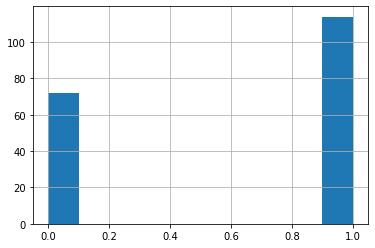

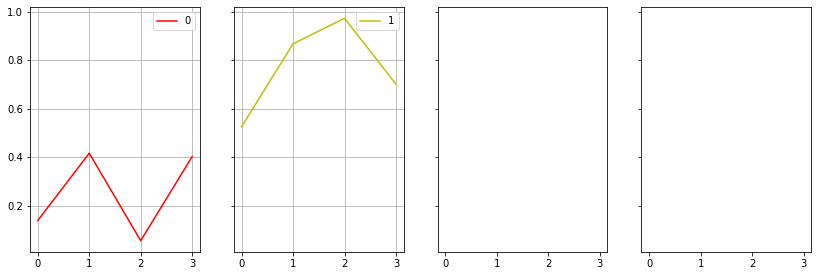

In [43]:
#Pair country name and prediction into a dataframe
prediction=pd.DataFrame(list(zip(list(gendereq['Country Name'].unique()),np.array(clustering).tolist())), columns =['Country Code', 'Category']).sort_values(by=['Category'],ascending=False)

#Create plot
f0, (histo) = plt.subplots(1,1, sharex=False,sharey=False)

f1, (d1,d2,d3,d4) = plt.subplots(1,4, sharex=True,sharey=True)
#Create individual plots
d1.plot(centers[0],label='0',color='r')
d1.legend()
d2.plot(centers[1],label='1',color='y')
d2.legend()
# d3.plot(centers[2],label='2',color='b')
# d3.legend()
# d4.plot(centers[3],label='3',color='g')
# d4.legend()
d1.grid()
d2.grid()
# d3.grid()
# d4.grid()

#Create histogram
histo.hist(clustering)
histo.grid()
fig = plt.gcf()
fig.set_size_inches(14,4.5)
f0.savefig('Graphs0.png')


fig = plt.gcf()
fig.set_size_inches(14,4.5)
f1.savefig('Graphs1.png')

#Export to excel
prediction.to_excel('Categorized Countries.xlsx', 'Ranking',index=False) #Create excel

wb = load_workbook(filename = 'Categorized Countries.xlsx') #Load workbook
ws = wb.active
ws.column_dimensions['A'].width = 29 #Set first column width


#Add plots to excel
my_png0 = openpyxl.drawing.image.Image('Graphs0.png')
ws.add_image(my_png0, 'C1')
my_png1 = openpyxl.drawing.image.Image('Graphs1.png')
ws.add_image(my_png1, 'C26')

#Save workbook
wb.save('Categorized Countries.xlsx')
#End message
print('Document ready. Run again for other analysis.')